In [1]:
import dill
import gym

100%|██████████| 200000/200000 [00:24<00:00, 8017.00it/s]


[[0.48823423 0.3898702  0.39168903 0.3904422 ]
 [0.27200755 0.29891308 0.25898775 0.39598908]
 [0.36740822 0.36707089 0.36758558 0.37435338]
 [0.33534705 0.32780612 0.31180527 0.36789954]
 [0.50382604 0.28253244 0.28796716 0.2703721 ]
 [0.         0.         0.         0.        ]
 [0.31256968 0.30076646 0.30291078 0.30215015]
 [0.         0.         0.         0.        ]
 [0.29269116 0.33112626 0.32537525 0.53797003]
 [0.41392834 0.59509955 0.40752787 0.39099179]
 [0.57460293 0.52478103 0.5038639  0.44485693]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.47993769 0.57731699 0.70129015 0.51111621]
 [0.71243755 0.84017054 0.79753872 0.76160877]
 [0.         0.         0.         0.        ]]


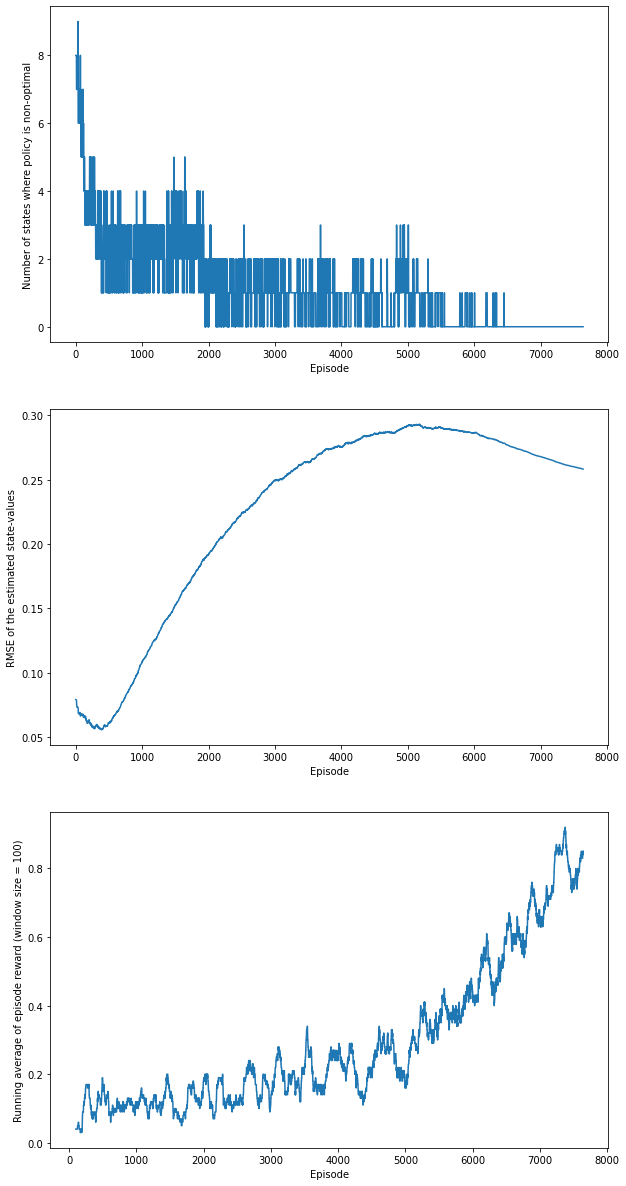

In [2]:
%run sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:45<00:00, 4431.84it/s]


[[0.80567052 0.80197187 0.80265877 0.80155018]
 [0.54441209 0.51040328 0.52754841 0.79567218]
 [0.69461401 0.68936005 0.68844487 0.78805217]
 [0.54016522 0.52382328 0.47447536 0.78466213]
 [0.80808726 0.53209718 0.55091561 0.52178774]
 [0.         0.         0.         0.        ]
 [0.50314612 0.26995448 0.51186444 0.30448107]
 [0.         0.         0.         0.        ]
 [0.50704604 0.58470652 0.55215575 0.81183638]
 [0.5672456  0.8155602  0.51392132 0.50651527]
 [0.75837976 0.55085215 0.47510503 0.39240304]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.59390863 0.56083409 0.8801654  0.53871337]
 [0.84471377 0.9430896  0.89755315 0.88220655]
 [0.         0.         0.         0.        ]]


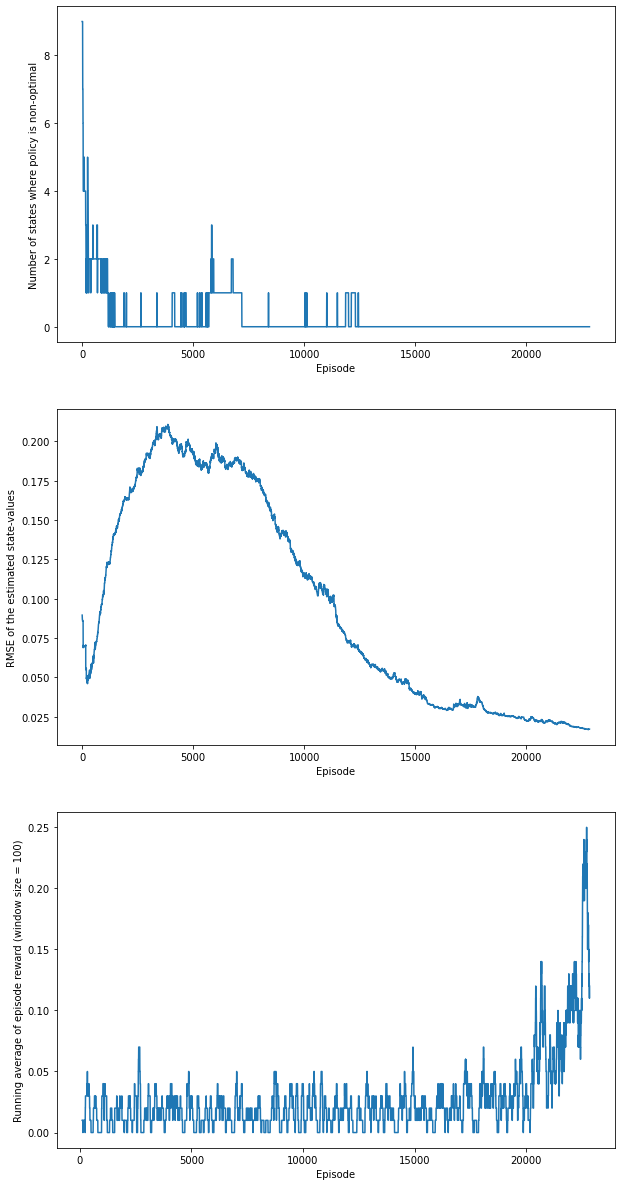

In [2]:
%run expected_sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:23<00:00, 8532.06it/s]


[[0.77356806 0.77171105 0.77177496 0.77143805]
 [0.5121624  0.50685737 0.50343863 0.7678802 ]
 [0.68203889 0.67314023 0.6751349  0.76341466]
 [0.5038373  0.52258867 0.48789444 0.76072434]
 [0.77416217 0.50200396 0.51901557 0.50273811]
 [0.         0.         0.         0.        ]
 [0.49367379 0.22096389 0.49784902 0.2477182 ]
 [0.         0.         0.         0.        ]
 [0.50876977 0.56137689 0.50952662 0.77666208]
 [0.55363359 0.78233724 0.54592481 0.51145777]
 [0.73796259 0.55060951 0.45190389 0.43971194]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.58002511 0.60659833 0.84806112 0.60546299]
 [0.82733151 0.92108232 0.8837699  0.87595874]
 [0.         0.         0.         0.        ]]


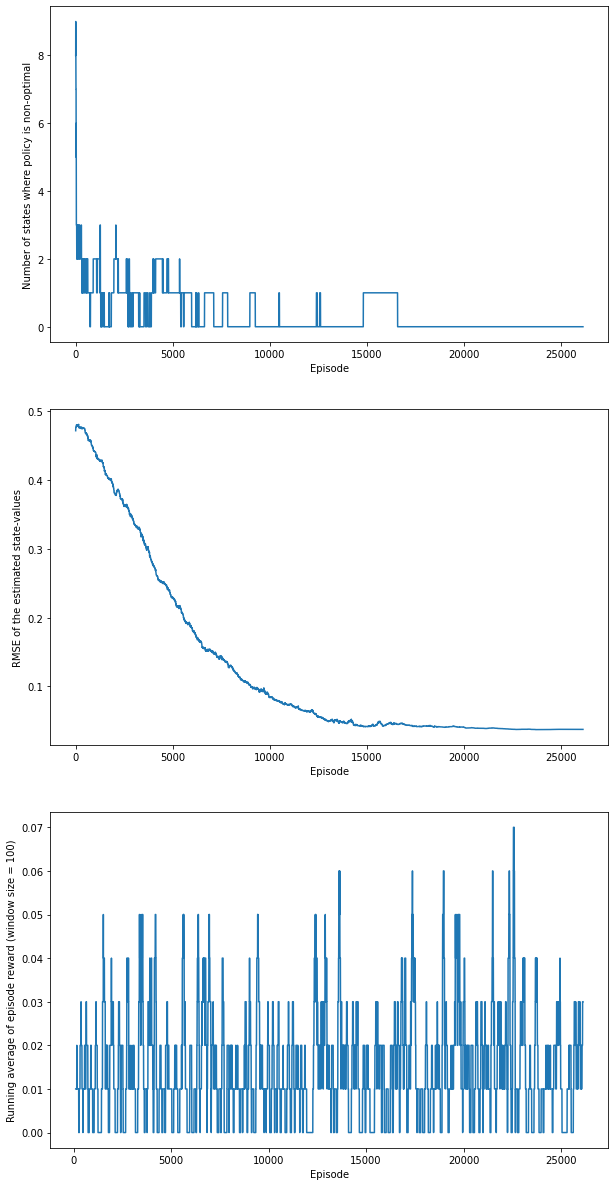

In [4]:
%run q_learning_training.py 4 200000

100%|██████████| 200000/200000 [00:26<00:00, 7636.11it/s]


[[0.81309183 0.80921256 0.80914362 0.80909285]
 [0.51998798 0.52485773 0.53158687 0.80466783]
 [0.71063371 0.70213986 0.71103059 0.79924838]
 [0.5403842  0.5270295  0.486515   0.79630125]
 [0.8137356  0.55038516 0.54810195 0.53016543]
 [0.         0.         0.         0.        ]
 [0.46383781 0.24730411 0.55484141 0.26866806]
 [0.         0.         0.         0.        ]
 [0.53200886 0.54872201 0.55162951 0.81554474]
 [0.57701208 0.82001388 0.5593738  0.5123017 ]
 [0.76758167 0.58272101 0.51035234 0.43032113]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.54940272 0.63490288 0.87944248 0.57732833]
 [0.8515624  0.93598618 0.89258501 0.86131481]
 [0.         0.         0.         0.        ]]


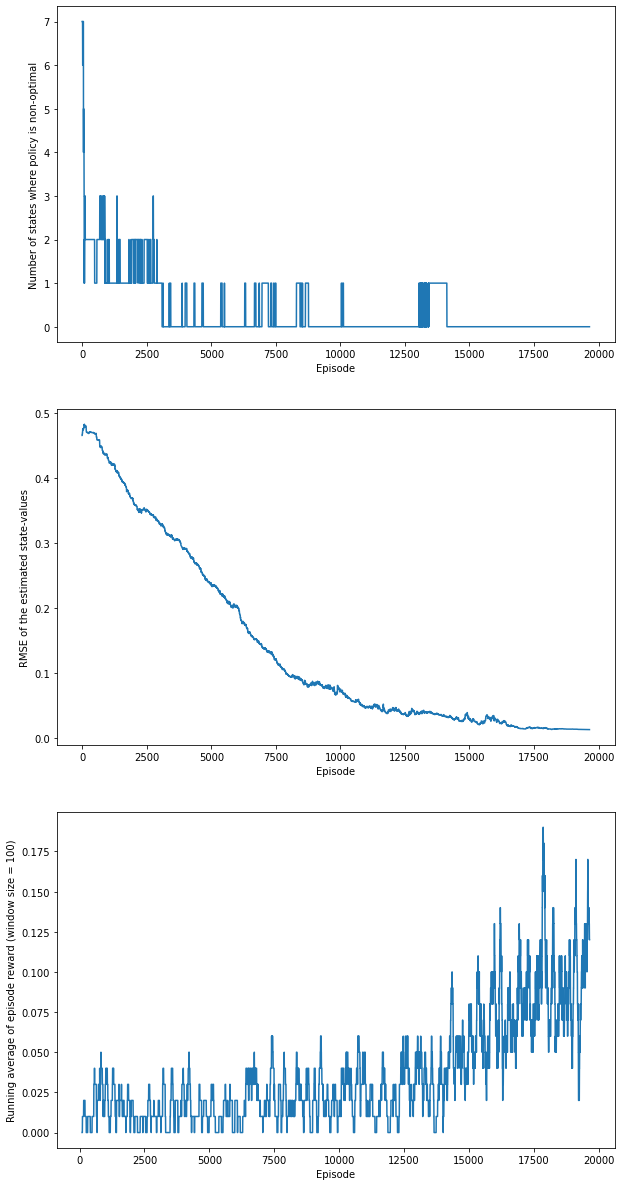

In [3]:
%run q_learning_eps_training.py 4 200000

In [3]:
# Fetch the agents that resulted from training in inference mode:
agents= {}
for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    with open(f'{alg}_agent.dill', 'rb') as fopen:
        agents[alg] = dill.load(fopen)
    agents[alg].set_mode('inference')

In [4]:
map_size = int(agents['sarsa'].env.observation_space.n **(1/2))

if map_size == 4:
    map_name = '4x4'
elif map_size == 8:
    map_name = '8x8'

env = gym.make('FrozenLake-v1', desc=None, map_name=map_name, is_slippery=True)
env._max_episode_steps = 10000

In [5]:
average_reward_per_episode = {}

for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    episodes = 0
    total_reward = 0
    observation = env.reset()
    while episodes < 10000:
        action = agents[alg].get_action(observation)
        observation, reward, done, info = env.step(action)
        total_reward += reward

        if done:
            observation = env.reset()
            episodes += 1

    average_reward_per_episode[alg] = total_reward / episodes

env.close()

In [8]:
average_reward_per_episode

{'sarsa': 0.83,
 'expected_sarsa': 0.8246,
 'q_learning': 0.8178,
 'q_learning_eps': 0.8218}